<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:
# Import libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_circles

import seaborn as sns

In [2]:
# Create data points (circles)
# Make random circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [3]:
# Convert data into a DataFrame
# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas DataFrame
X = pd.DataFrame(X1, columns = columns)

In [4]:
# Check data
# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.001327   -0.000696
std      0.523087    0.527152
min     -1.060452   -1.064572
25%     -0.292426   -0.278410
50%      0.000896   -0.004540
75%      0.276449    0.292815
max      1.077918    1.071726

Sample of X__________________________________________________
          A         B
0  0.817657  0.548522
1  0.102430 -0.127967
2 -0.939514  0.170798
3 -0.075136 -0.282452
4  0.588492  0.746438


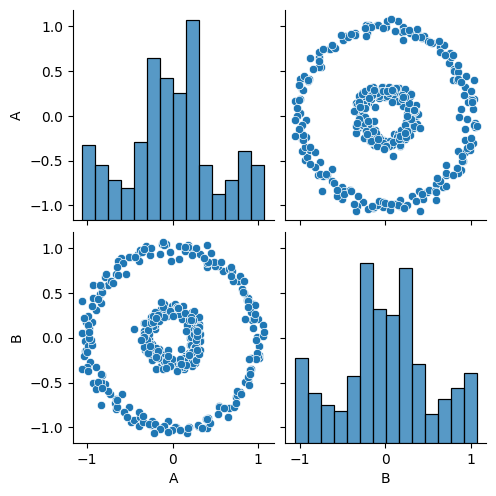

In [5]:
# Visualize feature relationships in the dataset
sns.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

In [6]:
# Datatypes
X.dtypes

A    float64
B    float64
dtype: object

In [7]:
# Check for missing values
X.isnull().sum()

A    0
B    0
dtype: int64

In [8]:
# Display correlation matrix
X.corr()

A         B
A  1.000000 -0.005287
B -0.005287  1.000000

Answer: The two features have numerical values with a normal distribution, and there are no missing data. No significant correlation is observed among features, but distinct inner and outer clusters are visible.

### Question: Which features could/should be used to cluster the data points?

Answer: Either feature A or B can be used to cluster the data points.

In [9]:
# Create some supporting functions
# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # Start with no centroids
    centroids = []
    
    # Need one centroid for each cluster
    for i in range(K):
        # It can be multi-dimensional
        dimensions = []
        
        # Loop through each feature to create a random value for each dimension
        for f in features:
            # Create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max()) # Answer
            dimensions.append(x)
        
        # Add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [10]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []

    # Convert x to a NumPy array; x contains all the features of a data point
    p = np.array(x)

    # Iterate through each centroid in the list of centroids
    for c in centroids:
        # Convert c to a NumPy array; c contains the coordinates for all the features
        q = np.array(c)

        # Calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt(np.square(p - q).sum()) # Answer
        # Note: This is the formula for Euclidean distance: sqrt((x1-y1)^2 + (x2-y2)^2 + ... + (xn-yn)^2)

        # Add the distance for each centroid to the distances list
        distances.append(d)

    # Return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [11]:
# Recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    
    # For each of the existing centroids
    for i in range(len(centroids)):
        # Check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            
            # For all the features
            for f in X.columns:
                # Calculate the mean
                x = X[f][y == i].mean() # Answer
                dimensions.append(x)
            
            c.append(dimensions)
        # If a cluster got no members
        else:            
            # Keep the previous coordinates
            c.append(centroids[i])
            
    return c

In [12]:
# Plot a chart of the data points and centroids, either generic or identifying the clusters
# NOTE: For visualization purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters=True):
    # Unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # Show distinct colors if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            # Scatter plot for each cluster with a distinct color
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c=colours[i], label='Cluster %d' % i)
    # Show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label='Data Point')

    # Label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # Identify the centroids
    # Scatter plot for centroids with black color, 'x' marker, and label 'Centroid'
    ax.scatter(a, b, c='k', linewidths=5, marker='x', label='Centroid')
    for i in range(len(a)):
        # Use distinct color for each cluster or black if not showing clusters
        c = colours[i] if show_clusters else 'k'
        # Draw vertical and horizontal lines to represent the centroid
        ax.axvline(x=a[i], color=c, linestyle='--', linewidth=1)
        ax.axhline(y=b[i], color=c, linestyle='--', linewidth=1)
        
    # Create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    # Show legend
    ax.legend()

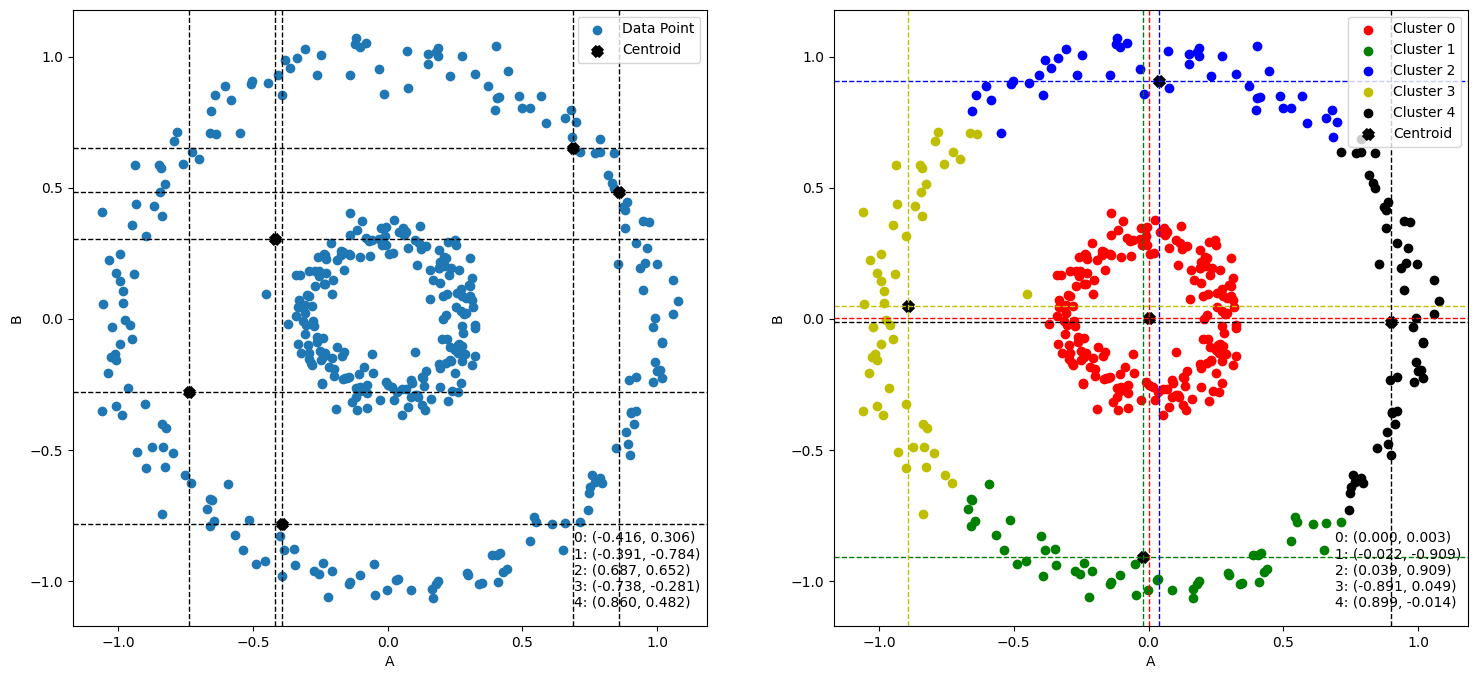

In [13]:
# K_Means clustering
# Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5 # Choose different values for `K`

# List the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)

# Plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# Repeat until no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis=1).values # Answer

    # Move the known assignment before the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# Plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?

Answer: Different cluster assignments and centroids were created in each run. This is mostly due to the random initialization of the centroids in the dataset.

### Question: What happens if `K` is changed?

The number of clusters change as K changes. If K is too small, the clusters may be too broad and underfitting might occur. While if K is too large, overfitting might occur and the algorithm may not generalize well to new data.

>

>

>



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



